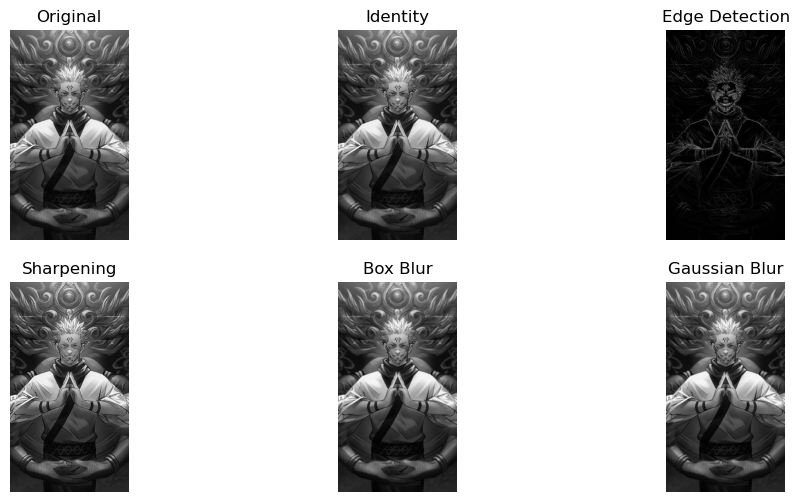

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
box_blur_kernel = np.ones((3, 3), np.float32) / 9
gaussian_blur_kernel = cv2.getGaussianKernel(3, 1)
gaussian_blur_kernel = gaussian_blur_kernel @ gaussian_blur_kernel.T  # Convert to 2D

# Apply convolution
identity_output = cv2.filter2D(image, -1, identity_kernel) #same output image
edge_output = cv2.filter2D(image, -1, edge_kernel) #Highlights edges
sharpen_output = cv2.filter2D(image, -1, sharpen_kernel) #Enhances details
box_blur_output = cv2.filter2D(image, -1, box_blur_kernel) # Simple blur
gaussian_blur_output = cv2.filter2D(image, -1, gaussian_blur_kernel) #Smooth blur

# Display results
titles = ['Original', 'Identity', 'Edge Detection', 'Sharpening', 'Box Blur', 'Gaussian Blur']
images = [image, identity_output, edge_output, sharpen_output, box_blur_output, gaussian_blur_output]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


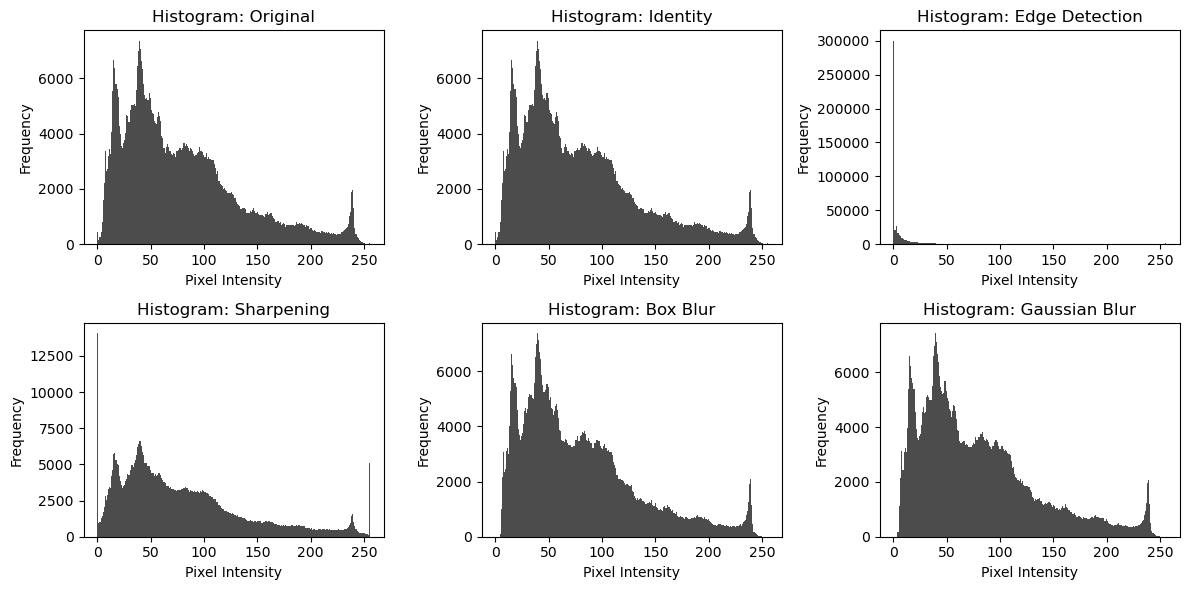

In [9]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(images[i].ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title(f'Histogram: {titles[i]}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

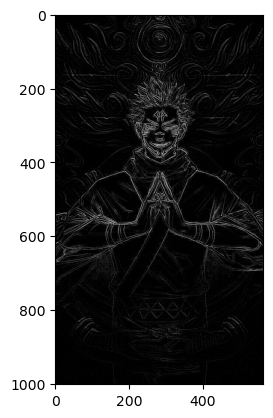

In [7]:
plt.imshow(edge_output,cmap="gray")

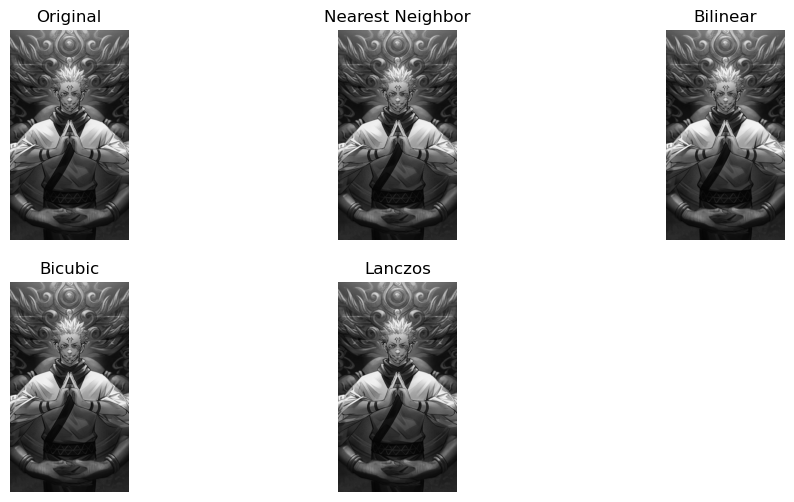

In [11]:
# Define new size (reducing size for sampling)
scale_factor = 0.5  # Resize to 50% of original
new_size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor))

# Apply different interpolation techniques
nearest_neighbor = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST) #Picks the closest pixel without blending.
bilinear = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR) #Averages the values of surrounding pixels.
bicubic = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC) #Uses a more complex formula (16 neighboring pixels) for smoother results.
lanczos = cv2.resize(image, new_size, interpolation=cv2.INTER_LANCZOS4) #Uses a sinc function to preserve details.

# Display results
titles = ['Original', 'Nearest Neighbor', 'Bilinear', 'Bicubic', 'Lanczos']
images = [image, nearest_neighbor, bilinear, bicubic, lanczos]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i],cmap="gray")
    plt.title(titles[i])
    plt.axis('off')

plt.show()


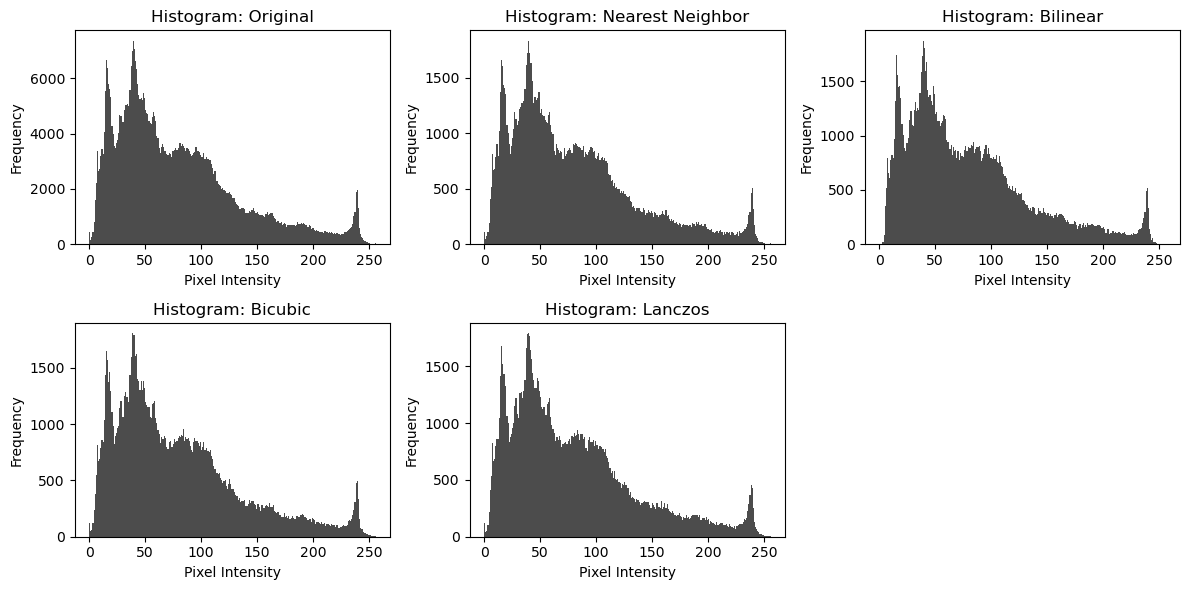

In [13]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.hist(images[i].ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title(f'Histogram: {titles[i]}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()